In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#gradient function 
def difference_quotient(f,x,h): #함수의 변화율
    return( f(x+h) - f(x)) / h

In [3]:
# 예시
def square(x):
    return x*x

In [4]:
def derivative(x):
    return 2*x

### x^2의 도함수가 2x라는 건 다 알아요.
### 그런데 만약에 모른다고 가정했을 때,
### 위에서 정의한 difference_quotient 이용해서 얼마나 정확하게 근사값을 구할 수 있는지 체크해보자!!

In [5]:
derivative_estimate=lambda x: difference_quotient(square, x, h=0.00001)

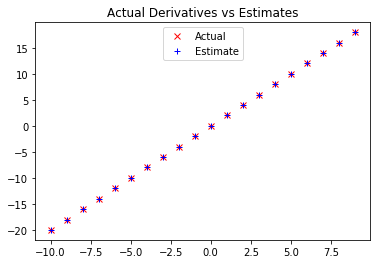

In [9]:
x = range(-10, 10)
plt.title("Actual Derivatives vs Estimates")
plt.plot(x, list(map(derivative, x)), 'rx', label="Actual")
plt.plot(x,list(map(derivative_estimate, x)), 'b+', label="Estimate")
plt.legend(loc = 9)
plt.show()

In [10]:
# 다변수 함수의 gradient의 근사값을 구하는 함수를 만들어보자!
def partial_derviative_quotient(f,v,i,h):
    """ 함수 f의 i번째 편도함수가 v(벡터)에서 가지는 값"""
    w=[v_j + (h if j==i else 0)
      for j, v_ in enumerate(v)]
    return (f(w) - f(v)) / h

In [11]:
def estimate_gradient(f, a, h=0.0001):
    return [partial_derviative_quotient(f,v,i,h)
           for i, _ in enumerate(v)] # 인덱스만 받고 싶고 값은 안받고 싶을 때 뒤에 _를 쓴다. 반대도 됨.

# Gradient 적용하기 !

### 제곱합합수(sum of square)는 v(벡터)를 파라미터로 받았을 때, v=0벡터일때 가장 작은 값을 가져요!
### 그런데, 만약에 이 사실을 모른다고 가정하고, 경사하강법을 이용해 3차원 벡터의 최솟값을 구해보자!
## -----------------------
#### 임의의 시작점을 잡고, gradient가 아주 작아질때까지 경사의 반대방향으로 조금씩 이동시킴!

In [21]:
def step(v, direction, step_size):
    """v 벡터를 step_size만큼 direction 방향으로 이동"""
    return [v_i + step_size * direction_i 
            for v_i, direction_i in zip(v, direction)]

In [13]:
def sum_of_squares_gradient(v):
    return [2*v_i for v_i in v]
"""
ex) v=[x1,x2,x3]라 하면
    sum_of_square =x1^2+x2^2+x3^2
    각 원소에 대해 편미분 적용 -> gradient =[2* x1, 2* x2, 2*x3]
"""

'\nex) v=[x1,x2,x3]라 하면\n    sum_of_square =x1^2+x2^2+x3^2\n    각 원소에 대해 편미분 적용 -> gradient =[2* x1, 2* x2, 2*x3]\n'

In [87]:
#1. 임의의 시작점을 잡자
import random
random.seed(12345)
v=[random.randint(-10,10) for i in range(3)]

In [98]:
tolerance=0.000001 #근사값과 참값의 차이가 이것보다 작으면 경사하강법 종료 (기준값)

In [99]:
import math
def distance(x,y): #두 점 사이의 거리 구하기
    a=0
    for x_i, y_i in zip(x,y):
        a += (x_i-y_i) **2
    return math.sqrt(a) # sqrt : 제곱근 

In [100]:
distance([3,4],[0,0])

5.0

In [101]:
#2. 제곱합 함수의 경사하강법 과정
while True:
    gradient = sum_of_squares_gradient(v) #v의 gradient를 계산
    next_v=step(v, gradient, -0.01) #원래 gradient의 반대방향으로 이동
    if distance(next_v, v) < tolerance :
        break
    v=next_v

In [103]:
print(v) #totlerance

[1.4161909964880136e-06, -4.7206366549600495e-06, -4.7206366549600445e-07]


## 8.4 적절한 이동거리 구하기
#### 경사하강법 적용 시, step_size를 정하는 방법이 몇 가지 있다.

##### 1) 이동 거리를 항상 고정
##### 2) 시간에 따라 이동거리를 점차 줄여나감
##### 3) 이동할 때마다, 목적함수 최소화하는 이동거리로 정함.

###### 마지막이 제일 좋아보이는데, 계산 비용이 크기 때문에, 몇 몇 정해진 이동 거리를 시도해보고, 그 중 목적함수를 가장 최소화하는 값을 고르는 방법이 있다.

In [104]:
step_sizes=[100,10,1,0.1,0.01,0.001,0.0001,0.00001]

In [105]:
def safe(f):
    """f와 똑같은 함수를 반환하지만 f에 오류가 발생하면 무한대를 반환"""
    def sate_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # 무한대 표기법
    return safe_f

In [106]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    # batch : 반복문 돌 때마다 데이터셋 전체를 살펴본다.
    """
    target_fn : 경사하강법 적용하려는 함수
    gradient_fn : target_fn의 gradient 함수
    theta_0 :시작점
    totlerance : 기준
    """
    step_sizes=[100,10,1,0.1,0.01,0.001,0.0001,0.00001]
    theta=theta_0 #처음에는 theta를 시작점으로 설정!
    target_fn=safe(target_fn) #오류를 처리할 수 있는 target_fn으로 변환!
    value=target_fn(theta) #value : 최소화 하려는 값
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas=[step(theta, gradient, -step_size)
                    for step_size in step_sizes]
        
        #함수를 최소화 시키는 theta 선택 !
        next_theta=min(next_thetas, key=target_fn) # target_fn을 최소로 하는 next_theta 값을 사용.
        next_value=target_fn(next_theta)
        
        #tolerance만큼 수렴하면 멈춤
        if abs(value-next_value)<tolerance:
            return theta
        else:
            theta, value=next_theta, next_value
        

### 위의 minimize_batch적용하면, 반복문 돌 때마다 데이터 전체의 gradient값을 계산하기 때문에 시간이 오래 걸림
### 그런데, 대부분의 오류 함수는 더할 수 있는 속성ㅇ르 갖고 있다.
### 즉, 데이터 전체에 대한 오류값이 각 데이터 포인트의 오류값의 합과 같다

#### 이럴 때는, 한 번 반복문을 돌 때마다 데이터 포인트 1개에 대한 gradient를 계산하는 SGD(확률적 경사하강법)
#### SGD는 수렴할 때까지 전체 데이터셋을 반복적으로 사용, 한번 반복문 돌때다마 임의의 순서대로 데이터포인트를 사용한다.

In [108]:
def in_random_ordef(data):
    """
    임의의 순서대로 data의 데이터 포인트를 반환
    """
    indexs = [i for i, _ in enumerate(data)] #데이터 포인트의 index를 list로 반환
    random.shuffle(indexes) # 인덱스를 섞고 
    for i in indexes:
        yield data[i]

In [110]:
def vector_subtract(v, w):
    """각 성분끼리 뺀다"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c,v):
    """c : 숫자, v:벡터"""
    return [c*v_i for v_i in v]

In [109]:
# 각 데이터 포인트에 대해 gradient를 계산
# 최적해 근방에서 영원히 떠돌게 될 수가 있기 때문에 함수값이 한 동안 줄지 않으면 이동 거리를 줄이고 알고리즘을 종료

def minimize_stochastic(target_fn, gradient_fn,x,y, theta_0, alpha_0=0.01):
    
    data=zip(x,y)
    theta=theta_0 # 첫 시작점
    alpha=alpha_0 # 기본 이동거리 : 0.01
    min_theta, min_value=None, float("inf") #시작할 때의 최솟값
    iterations_with_no_improvement=0
    
    #만약 100번 넘게 반복하는 동안 더 작아지지 않으면 멈춤
    while iterations_with_no_improvement<100:
        value =sum (target_fn (x_i, y_i, theta) for x_i, y_i in data)
        
        if value<min_value:
            #새로운 최솟값을 찾았다면 이 값을 저장하고 기본 이동거리로 다시 돌아감
            min_theta, min_value=theta, value
            iterations_with_no_imporvement=0
            alpha=alpha_0
        else :
            #만약 최솟값이 줄어들지 않는다면 이동 거리를 축소
            iterations_with_no_improvement +=1
            alpha *=0.9
            
        #각 데이터 포인트에 대해 경사를 계산
        for x_i,y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta=vectorPsubtract(theta, scalar_multiply(alpha, gradient_i))